# Do Scatterplots and BettiCurve plot

## Load Data

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Do the reduced scatterplots and the betti Curves

In [10]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # for plotSubregions
import seaborn as sns

# persistence modules

import gtda
from gtda.diagrams import BettiCurve

from pathlib import Path

# import path variables
from src.config import data_path_processed, figures_path, simulation_processed
# import simulation parameters
from src.config import simulation_parameters

from src.auxiliary import savefig_severalformats, check_load_file

Load the data for the processed kind; and pick the particular processed type

In [11]:
processed = simulation_parameters['simulation_processed']
file_appendix = simulation_parameters["calculation_method"]

fn = f'diagrams_{simulation_parameters["calculation_method"]}.npy'
diags = check_load_file(data_path_processed / fn)  
# diags = {processed : diags}

fn = f'numSimulation_parameters_{simulation_parameters["calculation_method"]}.csv'
df_params = check_load_file(data_path_processed / fn) 
  
## pick the type of surface heights to consider
df_params = df_params[df_params['processed'] == processed]
df_params = df_params.reset_index(drop=True)
# diags = diags[processed]

In [12]:
df_params.columns

Index(['id', 'sequence', 'impacts', 'coverage', 'coverage_old',
       'coverage_normalized', 'coverage_labels', 'Sa', 'Sq', 'Ssk', 'Sku',
       'Sz', 'Sdq', 'Sdr', 'numPts_0', 'numPts_1', 'entropy_giotto_0',
       'entropy_giotto_1', 'entropy_giotto_norm_0', 'entropy_giotto_norm_1',
       'entropy_gudhi_0', 'entropy_gudhi_1', 'entropy_gudhi_norm_0',
       'entropy_gudhi_norm_1', 'mean_pers_0', 'std_pers_0', 'mean_pers_1',
       'std_pers_1', 'norm_pers_0', 'norm_pers_1', 'max_pers_0', 'max_pers_1',
       'amplitude_bottleneck_0', 'amplitude_bottleneck_1',
       'amplitude_wasserstein_0', 'amplitude_wasserstein_1',
       'amplitude_betti_0', 'amplitude_betti_1', 'amplitude_landscape_0',
       'amplitude_landscape_1', 'amplitude_silhouette_0',
       'amplitude_silhouette_1', 'amplitude_heat_0', 'amplitude_heat_1',
       'amplitude_persistence_image_0', 'amplitude_persistence_image_1',
       'amplitude_vector_0', 'amplitude_vector_1', 'processed'],
      dtype='object')

Compute the 0-dim and 1-dim Betti Curves:

In [13]:
# load the fit_transformer for bettiCurves
bc = BettiCurve()
bc_simu = bc.fit_transform(diags)

# get 0 and 1 dimensional betti curves
bc_simu0 = bc_simu[df_params.index, 0, :]
bc_simu1 = bc_simu[df_params.index, 1, :]

# get the samplings for the threshold values
samplings = bc.samplings_[0]

## Compute and plot

Stripplopts for conventional parameters

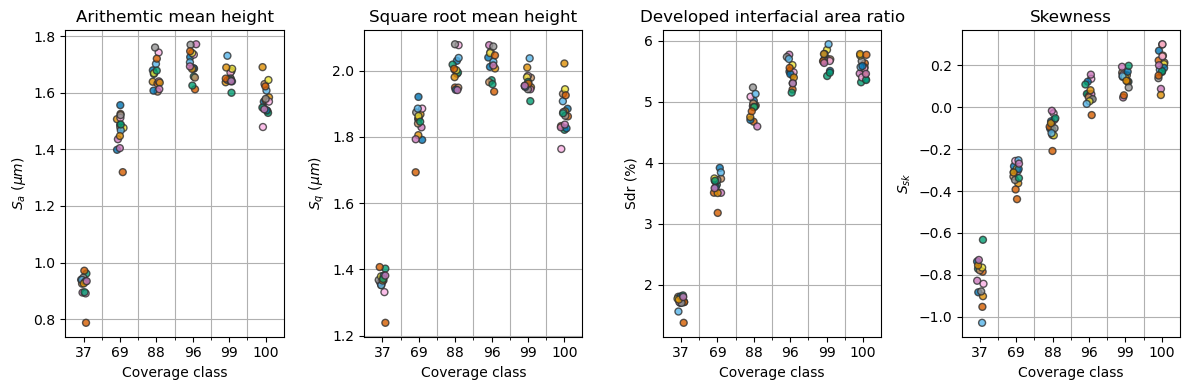

In [14]:
fig, ax = plt.subplots(1,4, figsize=(12,4), dpi=100)

plot_cols = ['Sa', 'Sq', 'Sdr', 'Ssk']
plot_labels = ['$S_a$', #(\SI{100}{\micro\metre})
               '$S_q$',
               '$S_{dr}$',
               '$S_{sk}$'
               ]
plot_long_labels = ['Arithemtic mean height', #(\SI{100}{\micro\metre})
               'Square root mean height',
               'Developed interfacial area ratio',
               'Skewness'
               ]
df_plot = df_params.copy(deep=True)

for i, name in enumerate(plot_cols):
#   axi = np.unravel_index(i, (2,4))
  axi = i
  # Sa and Sq are in micrometer
  if name in ['Sa', 'Sq']:
    df_plot.loc[:, name] = 1000*df_plot.loc[:, name]
  # Sdr is in micrometer and it's a ratio
  if name == 'Sdr':
    df_plot.loc[:, name] = 100*df_plot.loc[:, name]
  sns.stripplot(data=df_plot, x='coverage', y=name,
                hue='sequence', palette='colorblind',
                ax=ax[axi], linewidth=1,edgecolor='gray', jitter=0.1,
                alpha=0.8)

  if name in ['Sa', 'Sq']:
    ax[axi].set_ylabel(plot_labels[i] +' ($\mu m$)')
  elif name == 'Sdr':
    ax[axi].set_ylabel("Sdr (%)")
  else:
    ax[axi].set_ylabel(plot_labels[i])
    
  ax[axi].grid(True, axis='y')
  ax[axi].set_xlabel('Coverage class')
  ax[axi].set_title(plot_long_labels[i])
  
  ax[axi].set_xticks([(1+2*i)/2 for i in range(5)], 
                     minor=True)
  ax[axi].xaxis.grid(True, which='minor')
  ax[axi].get_legend().remove()
fig.tight_layout()


savefig_severalformats(fig, f'stripplot_conventional_{file_appendix}',
                       figures_path)

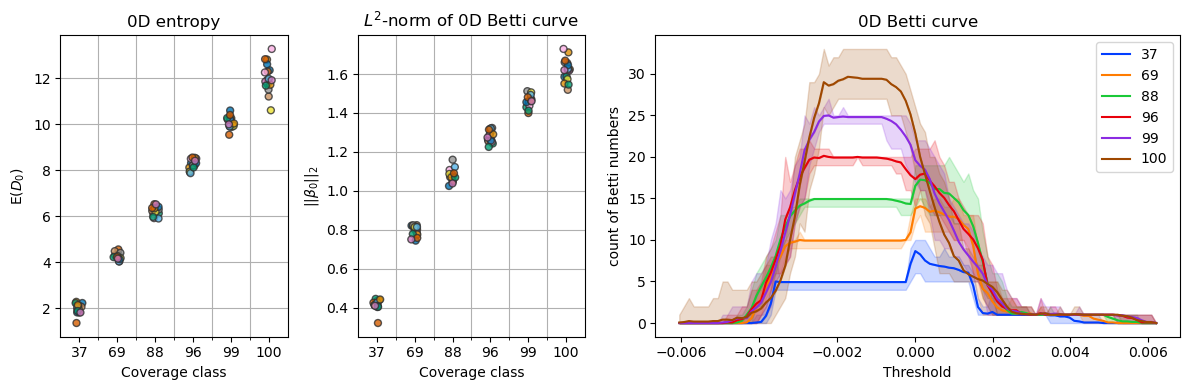

In [15]:

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 4), dpi=100)
gs = GridSpec(1, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2:])

ax = [ax1, ax2, ax3]
# fig, ax = plt.subplots(1,4, figsize=(12,4), dpi=100)

plot_cols = ['entropy_gudhi_0', 'amplitude_betti_0']
plot_labels = ['E($D_0$)', '$||β_0||_2$']
plot_long_labels = [
    '0D entropy', '$L^2$-norm of 0D Betti curve']

for i, name in enumerate(plot_cols):
    #   axi = np.unravel_index(i, (2,4))
    axi = i
    sns.stripplot(data=df_params, x='coverage', y=name,
                  hue='sequence', palette='colorblind',
                  ax=ax[axi], linewidth=1, edgecolor='gray', jitter=0.1,
                  alpha=0.8)

    ax[axi].grid(True, axis='y')
    ax[axi].set_xlabel('Coverage class')
    ax[axi].set_ylabel(plot_labels[i])
    ax[axi].set_title(plot_long_labels[i])

    ax[axi].set_xticks([(1+2*i)/2 for i in range(5)],
                       minor=True)
    ax[axi].xaxis.grid(True, which='minor')
    ax[axi].get_legend().remove()

# betti curve
axi = 2
df_plot = pd.DataFrame(bc_simu0,
                       columns=[samplings[i] for i in range(100)])
# IF VALUES ARE MISSING THEN SUDDENLY THERE ARE NAN VALUES
df_plot['coverage'] = df_params['coverage'].values
df_plot['index'] = df_params.index.values

df_melt = pd.melt(df_plot,
                  id_vars=['coverage', 'index'],
                  value_vars=samplings)

# plot lines with mean and bootstrap confidence interval
# sns.lineplot(data=df_melt, x='variable', y='value',
#               # hue = 'index',
#              ci=100,
#              hue='coverage',
#              palette="bright",
#              ax=ax[axi])
# plot min-max-shading insated

df_shade = df_melt.groupby(by=['coverage', 'variable']).agg(
    {'value': ['min', 'mean', 'max']}).unstack('coverage')
palette = sns.color_palette("bright")

lines = []
for idx, cov in enumerate(np.unique(df_melt['coverage'].values)):
    ax[axi].fill_between(df_shade.index,
                         df_shade.loc[:, ('value', 'mean', cov)],
                         df_shade.loc[:, ('value', 'max', cov)],
                         color=palette[idx],
                         alpha=0.2)
    ax[axi].fill_between(df_shade.index,
                         df_shade.loc[:, ('value', 'min', cov)],
                         df_shade.loc[:, ('value', 'mean', cov)],
                         color=palette[idx],
                         alpha=0.2)
    line_tmp = ax[axi].plot(df_shade.index,
                              df_shade.loc[:, ('value', 'mean', cov)],
                              color=palette[idx])
    lines.append(line_tmp)

# ax[axi].hlines(0)

# ax[axi].legend(['16', '33', '50', '66', '83', '100'])
ax[axi].legend(np.unique(df_plot['coverage']))
ax[axi].set_xlabel('Threshold')
ax[axi].set_ylabel('count of Betti numbers')
ax[axi].set_title('0D Betti curve')
# # fig.savefig(os.path.join(plotpath, 'betticurve_0_simu'+processed+'.pdf'),
# #             dpi=100, bbox_inches='tight')

fig.tight_layout()

savefig_severalformats(fig, f'stripplot_tda_{file_appendix}',
                       figures_path)


In [16]:
print('Is there a overlap of 0D Entropy values for the last two classes?')

min_class = np.min(df_params.loc[df_params['coverage_labels']==5,'entropy_gudhi_0'])
max_class = np.max(df_params.loc[df_params['coverage_labels']==4,'entropy_gudhi_0'])
if min_class > max_class:
    print('  No overlap!')
elif min_class < max_class:
    print(f'  Overlap! of {max_class - min_class}')
else:
    print('  Same border!')
    
print('Is there a overlap of L2 norm of betti curve values for the last two classes?')

min_class = np.min(df_params.loc[df_params['coverage_labels']==5,'amplitude_betti_0'])
max_class = np.max(df_params.loc[df_params['coverage_labels']==4,'amplitude_betti_0'])
if min_class > max_class:
    print('  No overlap!')
elif min_class < max_class:
    print(f'  Overlap! of {max_class - min_class}')
else:
    print('  Same border!')

Is there a overlap of 0D Entropy values for the last two classes?
  No overlap!
Is there a overlap of L2 norm of betti curve values for the last two classes?
  No overlap!
